## This dataset contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df= pd.read_csv("churn_modelling.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Variables

#### Row Numbers= from 1 to 10000
#### CustomerId= Unique Ids for bank customer identification
#### Surname= Customer's last name
#### CreditScore= Credit score of the customer
#### Geography= The country from which the customer belongs
#### Age= Age of the customer
#### Tenure= Number of years for which the customer has been with the bank
#### Balance= Bank balance of the customer
#### NumOfProducts=Number of bank products the customer is utilising
#### IsActiveMember= whether the customer is active or not
#### Existed= where the customer closed the bank account or not
####  0 means active and it also means still have account with the bank
#### 1 means not active and it also means the customer has closed his/her account


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Exploratory data analysis

In [5]:
features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']

for c in features:
    corr= np.corrcoef(df[c], df["Exited"])[0][1]
    print(c +": " , corr)

CreditScore:  -0.027093539754657607
Age:  0.2853230378350672
Tenure:  -0.01400061225344457
Balance:  0.11853276877163368
NumOfProducts:  -0.04781986494944019
HasCrCard:  -0.0071377656030391515
IsActiveMember:  -0.15612827818890485
EstimatedSalary:  0.01209686102684462


##### Age and balance showed stronger correlation

<AxesSubplot:>

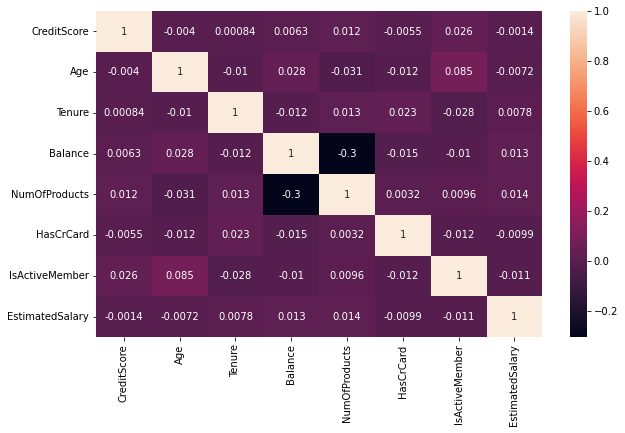

In [6]:
df_data=df[features]

plt.figure(figsize=(10,6))
sns.heatmap(df_data.corr(), annot= True)

In [7]:
df1=df[df["Exited"]==0]
df2=df[df["Exited"]==1]

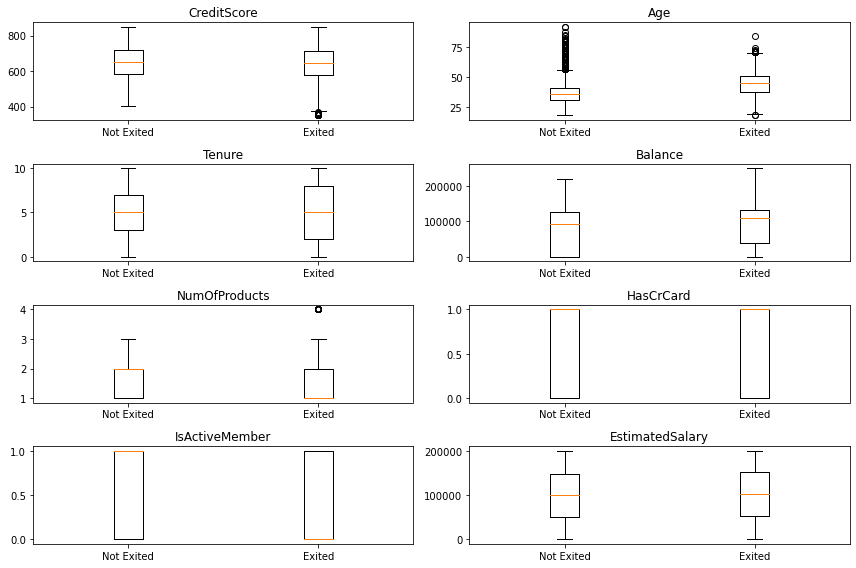

In [8]:
fig, axs= plt.subplots(4,2, figsize=(12,8))


for i in range(4):
    for j in range(2):
        k= 2*i+j
        if k>=8: continue

        feet= features[k]
        
        ax= axs[i,j]
        ax.boxplot([df1[feet], df2[feet]]);
        ax.set_title(feet)
        ax.set_xticklabels(['Not Exited', 'Exited'])
plt.subplots_adjust(wspace=.25)
plt.tight_layout()

## visualizing some features 

<AxesSubplot:xlabel='Exited', ylabel='count'>

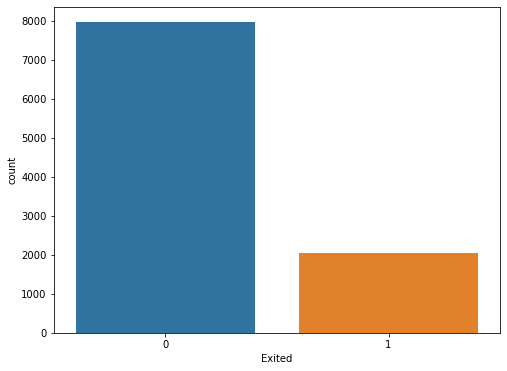

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

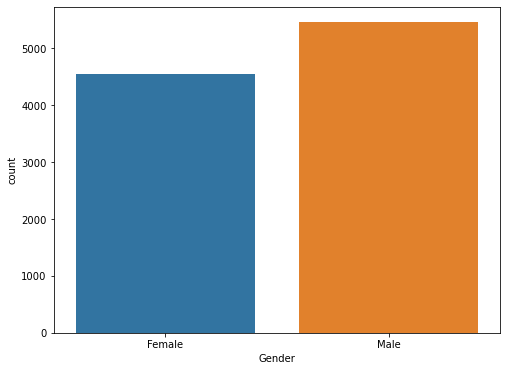

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

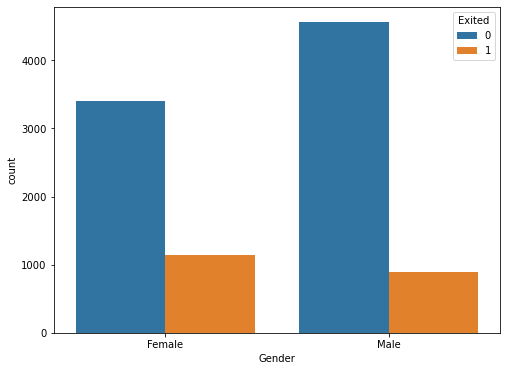

In [11]:
plt.figure(figsize=(8,6))

sns.countplot(x="Gender", hue="Exited", data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

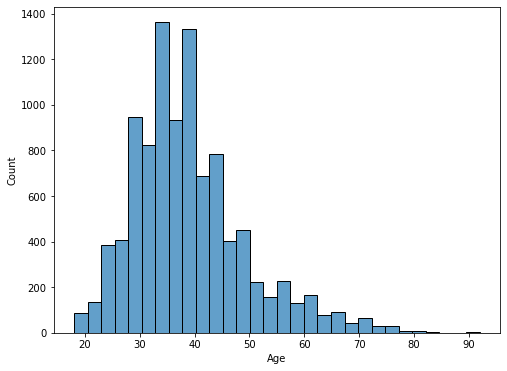

In [12]:
# Age distribution of thee customers

plt.figure(figsize=(8,6))
sns.histplot(x="Age", data=df, bins=30,alpha=0.7)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

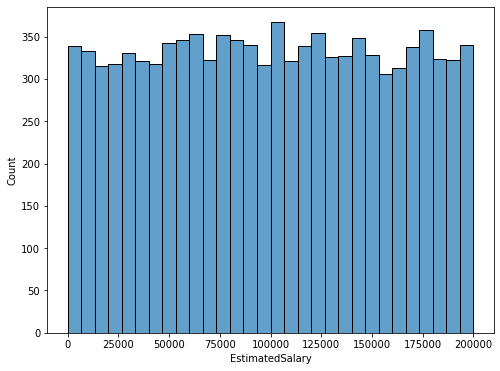

In [13]:
# Estimated salary distibution

plt.figure(figsize=(8,6))
sns.histplot(x="EstimatedSalary", data=df, bins=30,alpha=0.7)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

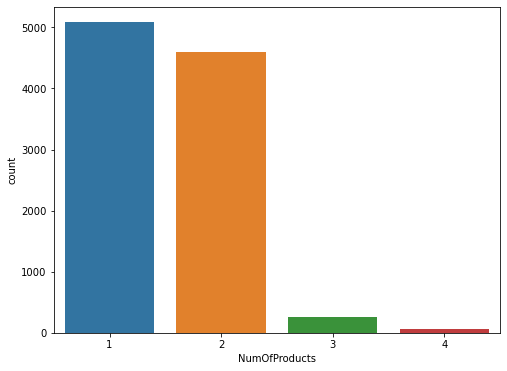

In [14]:
# plot to show the number of customers for different product

plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts',data=df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

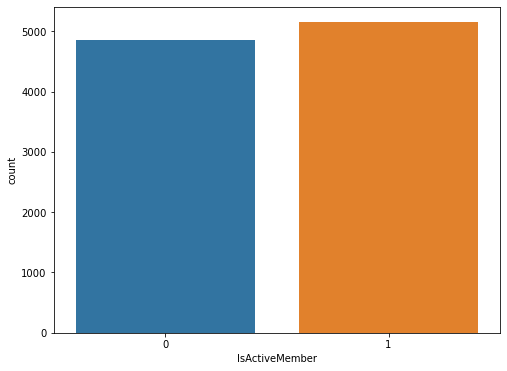

In [15]:
# plot to show the number of customers that are active

plt.figure(figsize=(8,6))
sns.countplot(x='IsActiveMember',data=df)

# Detail Analysis

`Number of active customer who still have account with the bank`

In [16]:
df[df["Exited"]==0]["IsActiveMember"].value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

`Number of active customers with Zero Balance`

In [17]:
df[df["Balance"]==0]["IsActiveMember"].value_counts()

1    1873
0    1744
Name: IsActiveMember, dtype: int64

``Number of customers with zero Balance who still have account with the Bank``

In [18]:
df[df["Balance"]==0]["Exited"].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

`Number of products that was used by customer who closed their account`

In [19]:
df[df["Exited"]==1]["NumOfProducts"].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

`Number of customers by Geography(location)`

In [20]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

`How many of the customers by Geography are active?`

In [21]:
df.groupby(["Geography", "IsActiveMember"]).count()["RowNumber"]

Geography  IsActiveMember
France     0                 2423
           1                 2591
Germany    0                 1261
           1                 1248
Spain      0                 1165
           1                 1312
Name: RowNumber, dtype: int64

`How many of the customers by Geography have closed their accounts?`

In [22]:
df.groupby(["Geography", "Exited"]).count()["RowNumber"]

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: RowNumber, dtype: int64

`Number of people who closed their account by Gender in spain`

In [23]:
df[df["Geography"]=="Spain"].groupby(["Exited", "Gender"]).count()["RowNumber"]

Exited  Gender
0       Female     858
        Male      1206
1       Female     231
        Male       182
Name: RowNumber, dtype: int64

`Number of people who closed their account by Gender in Germany`

In [24]:
df[df["Geography"]=="Germany"].groupby(["Exited", "Gender"]).count()["RowNumber"]

Exited  Gender
0       Female    745
        Male      950
1       Female    448
        Male      366
Name: RowNumber, dtype: int64

`Number of people who closed their account by Gender in France`

In [25]:
df[df["Geography"]=="France"].groupby(["Exited", "Gender"]).count()["RowNumber"]

Exited  Gender
0       Female    1801
        Male      2403
1       Female     460
        Male       350
Name: RowNumber, dtype: int64

# Statistical Analysis


Find the contingency table of `Number of product` and `Exited`.

Then, perform a chi-squared test to examine whether `Exited` is dependent or independent from `Number of product`. Use a 95% confidence level.

In [26]:
df1=pd.crosstab(df["NumOfProducts"], df["Exited"])
df1

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [27]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df1)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
          print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  1503.6293615070408
P-value:  0.0
degree of freedom:  3
Expected values: 
 [[4048.3892 1035.6108]
 [3655.017   934.983 ]
 [ 211.8158   54.1842]
 [  47.778    12.222 ]]
we reject the null hypothesis Ho (Categories are dependent)



Find the contingency table of `Gender` and `Exited`.

Then, perform a chi-squared test to examine whether `Exited` is dependent or independent from `Gender`. Use a 95% confidence level.

In [28]:
df2=pd.crosstab(df["Gender"], df["Exited"])
df2

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [29]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df2)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
          print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  112.91857062096116
P-value:  2.2482100097131755e-26
degree of freedom:  1
Expected values: 
 [[3617.5909  925.4091]
 [4345.4091 1111.5909]]
we reject the null hypothesis Ho (Categories are dependent)


# Feature Engineering

In [30]:
df1=pd.get_dummies(df["Geography"], prefix="Geography", drop_first=True)
df1.head()

,Geography_Germany,Geography_Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [31]:
df2=pd.get_dummies(df["Gender"], prefix="Gender", drop_first=True)
df2.head()

,Gender_Male
0,0
1,0
2,0
3,0
4,0


In [32]:
dff=pd.concat([df1,df2], axis=1)
dff.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [33]:
df=pd.concat([dff,df],axis=1)

In [34]:
df=df.drop(["Geography", "Gender", "RowNumber", "CustomerId", "Surname"], axis=1)

In [35]:
df.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [36]:
X=df.iloc[:, 0:11]

In [37]:
y=df["Exited"]

In [38]:
X= StandardScaler().fit_transform(X)

In [39]:
X

array([[-0.57873591, -0.57380915, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.57873591,  1.74273971, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.57873591, -0.57380915, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-0.57873591, -0.57380915, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.72790383, -0.57380915,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.57873591, -0.57380915, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [40]:
X= pd.DataFrame(X, columns=df.columns[:-1])
X.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.578736,-0.573809,-1.095988,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.578736,1.742740,-1.095988,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-0.578736,-0.573809,-1.095988,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-0.578736,-0.573809,-1.095988,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-0.578736,1.742740,-1.095988,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Logistic Regression

In [42]:
model1= LogisticRegression()

In [43]:
model1.fit(X_train, y_train)

LogisticRegression()

In [44]:
model1.score(X_train, y_train)

0.8114285714285714

In [45]:
l_pred= model1.predict(X_test)

In [46]:
print(confusion_matrix(y_test, l_pred))
print("\n")
print(accuracy_score(y_test, l_pred))
print("\n")
print(classification_report(y_test, l_pred))

[[2310   66]
 [ 501  123]]


0.811


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2376
           1       0.65      0.20      0.30       624

    accuracy                           0.81      3000
   macro avg       0.74      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000



# KNeighborsClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [48]:
model2= KNeighborsClassifier(n_neighbors=1)

In [49]:
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
model2.score(X_train, y_train)

1.0

In [51]:
k_pred=model2.predict(X_test)

In [52]:
print(confusion_matrix(y_test, k_pred))
print("\n")
print(accuracy_score(y_test, k_pred))
print("\n")
print(classification_report(y_test, k_pred))

[[2133  243]
 [ 333  291]]


0.808


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2376
           1       0.54      0.47      0.50       624

    accuracy                           0.81      3000
   macro avg       0.70      0.68      0.69      3000
weighted avg       0.80      0.81      0.80      3000



## Chosing the best K  value

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [54]:
error_rate = []
for i in range(1,40):
    
    model2 = KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train,y_train)
    K_pred = model2.predict(X_test)
    error_rate.append(np.mean(K_pred != y_test))


Text(0, 0.5, 'Error Rate')

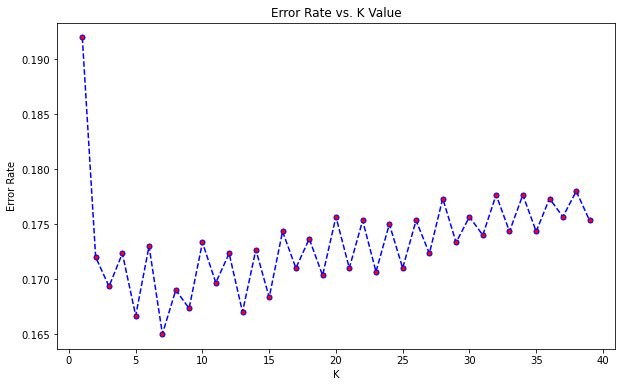

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K= 6
model2 = KNeighborsClassifier(n_neighbors=6)

model2.fit(X_train,y_train)
pred = model2.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,k_pred))
print("\n")
print(accuracy_score(y_test, k_pred))
print('\n')
print(classification_report(y_test,k_pred))

WITH K=17


[[2133  243]
 [ 333  291]]


0.808


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2376
           1       0.54      0.47      0.50       624

    accuracy                           0.81      3000
   macro avg       0.70      0.68      0.69      3000
weighted avg       0.80      0.81      0.80      3000



# DecisionTreeClassifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [58]:
model3=DecisionTreeClassifier()

In [59]:
model3 = DecisionTreeClassifier()

model3.fit(X_train,y_train)
d_pred = model3.predict(X_test)

In [60]:
print(confusion_matrix(y_test, d_pred))
print("\n")
print(accuracy_score(y_test, d_pred))
print("\n")
print(classification_report(y_test, d_pred))

[[2069  307]
 [ 314  310]]


0.793


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2376
           1       0.50      0.50      0.50       624

    accuracy                           0.79      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



# RandomForestClassifier

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [62]:
model4=RandomForestClassifier()

In [63]:
model4 = RandomForestClassifier(n_estimators=100, max_depth=10)

model4.fit(X_train,y_train)
r_pred = model4.predict(X_test)

In [64]:
print(confusion_matrix(y_test, r_pred))
print("\n")
print(accuracy_score(y_test, r_pred))
print("\n")
print(classification_report(y_test, r_pred))

[[2321   55]
 [ 352  272]]


0.8643333333333333


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2376
           1       0.83      0.44      0.57       624

    accuracy                           0.86      3000
   macro avg       0.85      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



# Support vector machine

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [66]:
model5=SVC()

In [67]:
model5 = SVC()

model5.fit(X_train,y_train)
s_pred = model5.predict(X_test)

In [68]:
print(confusion_matrix(y_test, s_pred))
print("\n")
print(accuracy_score(y_test, s_pred))
print("\n")
print(classification_report(y_test, s_pred))

[[2331   45]
 [ 396  228]]


0.853


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2376
           1       0.84      0.37      0.51       624

    accuracy                           0.85      3000
   macro avg       0.84      0.67      0.71      3000
weighted avg       0.85      0.85      0.83      3000



# hyper parameter tunning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid={"C":[1,10,100,100,1000], "gamma":[0.1,0.01,0.001,0.0001]}

In [71]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)

In [72]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.8s
[CV] END .....................................C=1, gamma=0.1; total time=   0.8s
[CV] END .....................................C=1, gamma=0.1; total time=   0.8s
[CV] END .....................................C=1, gamma=0.1; total time=   0.8s
[CV] END .....................................C=1, gamma=0.1; total time=   0.8s
[CV] END ....................................C=1, gamma=0.01; total time=   0.8s
[CV] END ....................................C=1, gamma=0.01; total time=   0.8s
[CV] END ....................................C=1, gamma=0.01; total time=   0.8s
[CV] END ....................................C=1, gamma=0.01; total time=   0.8s
[CV] END ....................................C=1, gamma=0.01; total time=   0.8s
[CV] END ...................................C=1, gamma=0.001; total time=   0.9s
[CV] END ...................................C=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [73]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [74]:
model5=SVC(C=1000, gamma=0.01)
model5.fit(X_train, y_train)
s_pred=model5.predict(X_test)

In [75]:
print(confusion_matrix(y_test, s_pred))
print("\n")
print(accuracy_score(y_test, s_pred))
print("\n")
print(classification_report(y_test, s_pred))

[[2312   64]
 [ 373  251]]


0.8543333333333333


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2376
           1       0.80      0.40      0.53       624

    accuracy                           0.85      3000
   macro avg       0.83      0.69      0.72      3000
weighted avg       0.85      0.85      0.83      3000



# GaussianNB

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
model6= GaussianNB()

In [78]:
model6 = DecisionTreeClassifier()

model6.fit(X_train,y_train)
g_pred = model6.predict(X_test)

In [79]:
print(confusion_matrix(y_test, g_pred))
print("\n")
print(accuracy_score(y_test, g_pred))
print("\n")
print(classification_report(y_test, g_pred))

[[2281  376]
 [ 321  322]]


0.7887878787878788


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2657
           1       0.46      0.50      0.48       643

    accuracy                           0.79      3300
   macro avg       0.67      0.68      0.67      3300
weighted avg       0.80      0.79      0.79      3300



# Neuro Network with Tensorflow

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [81]:
X_train= StandardScaler().fit_transform(X_train)

In [82]:
X_test= StandardScaler().fit_transform(X_test)

In [83]:
model=Sequential()

In [84]:
model.add(Dense(11, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [85]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [86]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=30,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [87]:
model_history=model.fit(X_train, y_train,epochs=1000,validation_split=0.33,callbacks=early_stop)

Epoch 1/1000
147/147 [==============================] - 1s 3ms/step - loss: 0.5559 - accuracy: 0.7238 - val_loss: 0.4942 - val_accuracy: 0.7927
Epoch 2/1000
147/147 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.8002 - val_loss: 0.4554 - val_accuracy: 0.7940
Epoch 3/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8038 - val_loss: 0.4299 - val_accuracy: 0.8023
Epoch 4/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8140 - val_loss: 0.4124 - val_accuracy: 0.8217
Epoch 5/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8273 - val_loss: 0.3979 - val_accuracy: 0.8317
Epoch 6/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8283 - val_loss: 0.3881 - val_accuracy: 0.8382
Epoch 7/1000
147/147 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8364 - val_loss: 0.3798 - val_accuracy:

In [88]:
model.evaluate(X_train, y_train)

219/219 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8659


[0.31897440552711487, 0.8658571243286133]

In [89]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [90]:
loss=pd.DataFrame(model_history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.555898,0.723822,0.494159,0.792730
1,0.459959,0.800171,0.455394,0.794029
2,0.429951,0.803796,0.429890,0.802250
3,0.410331,0.814033,0.412372,0.821722
4,0.395420,0.827255,0.397859,0.831675


<AxesSubplot:>

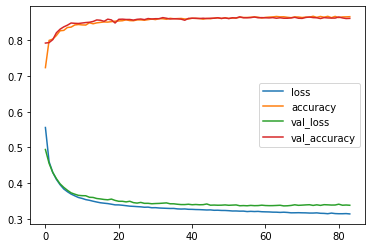

In [91]:
loss.plot()

In [92]:
y_pred=model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [93]:
y_pred=(y_pred>=0.5)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
print(confusion_matrix(y_test, y_pred))

[[2274  102]
 [ 334  290]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2376
           1       0.74      0.46      0.57       624

    accuracy                           0.85      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
cross_val_score(LogisticRegression(),X,y)

array([0.811 , 0.8085, 0.8085, 0.818 , 0.8025])

In [99]:
cross_val_score(DecisionTreeClassifier(),X,y)

array([0.782 , 0.7935, 0.7925, 0.8   , 0.79  ])

In [100]:
cross_val_score(RandomForestClassifier(),X,y)

array([0.8585, 0.8715, 0.862 , 0.868 , 0.863 ])

In [101]:
cross_val_score(KNeighborsClassifier(),X,y)

array([0.821 , 0.84  , 0.82  , 0.826 , 0.8275])

In [102]:
cross_val_score(SVC(C=1000, gamma=0.001),X,y)

array([0.8525, 0.863 , 0.854 , 0.863 , 0.8495])

# Random forest classifier and Neuro Network have the best score